# How to create arrow plots to visualize change

Arrow plots are useful for illustrating the direction and magnitude of change. I usually use these plots to show how participants' behavior changed before and after neurostimulation. 

This notebook is also a blog post: www.nikkimarinsek.com/blog/how-to-make-an-arrow-plot

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

### Create artificial data

In [2]:
n = 30 #number of subjects

#create dataframe
data = pd.DataFrame(columns=['subject','before','after','change'], index=range(n))
data.loc[:,'subject'] = range(n)
data.loc[:,'before'] = np.random.normal(0, 0.5, n)
data.loc[:,'after'] = np.random.normal(0.25, 0.5, n)
data.loc[:,'change'] = data['after'] - data['before']

data.head()

,subject,before,after,change
0,0,0.035141,0.835875,0.800734
1,1,-0.499050,0.138152,0.637202
2,2,0.149954,0.547894,0.397940
3,3,0.632260,0.681680,0.049421
4,4,-0.146754,-0.621795,-0.475041


### Create an arrow plot of "before vs. after" scores across individuals

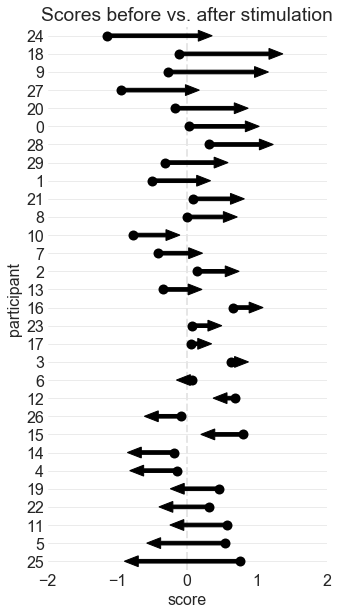

In [3]:
#sort individuals by amount of change, from largest to smallest
data = data.sort_values(by='change', ascending=False) \
           .reset_index(drop=True)

#initialize a plot
ax = plt.figure(figsize=(5,10))

#add start points
ax = sns.stripplot(data=data, 
                   x='before', 
                   y='subject', 
                   orient='h', 
                   order=data['subject'], 
                   size=10, 
                   color='black')

#define arrows
arrow_starts = data['before'].values
arrow_lengths = data['after'].values - arrow_starts

#add arrows to plot
for i, subject in enumerate(data['subject']):
    ax.arrow(arrow_starts[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.6,         #arrow head width
             head_length=0.2,        #arrow head length
             width=0.2,              #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color
    
#format plot
ax.set_title('Scores before vs. after stimulation')   #add title
ax.axvline(x=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='y', color='0.9')                        #add a light grid
ax.set_xlim(-2,2)                                     #set x axis limits
ax.set_xlabel('score')                                #label the x axis
ax.set_ylabel('participant')                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes

### Create an arrow plot of changes in scores 

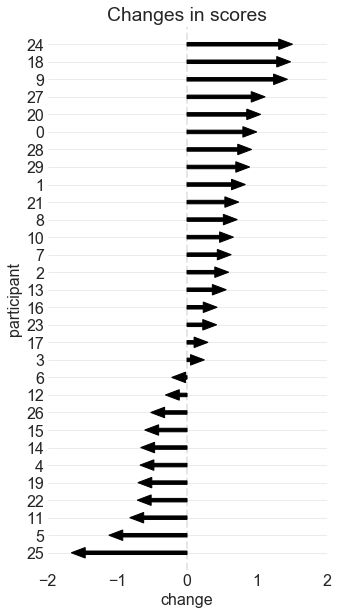

In [6]:
#sort individuals by amount of change, from largest to smallest
data = data.sort_values(by='change', ascending=True) \
           .reset_index(drop=True)

#initialize a plot
fig, ax = plt.subplots(figsize=(5,10))
ax.set_xlim(-2,2)
ax.set_ylim(-1,n)
ax.set_yticks(range(n))
ax.set_yticklabels(data['subject'])

#define arrows
arrow_starts = np.repeat(0,n)
arrow_lengths = data['change'].values

#add arrows to plot
for i, subject in enumerate(data['subject']):
    ax.arrow(arrow_starts[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.6,         #arrow head width
             head_length=0.2,        #arrow head length
             width=0.2,              #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color
    
#format plot
ax.set_title('Changes in scores')                     #add title
ax.axvline(x=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='y', color='0.9')                        #add a light grid
ax.set_xlabel('change')                               #label the x axis
ax.set_ylabel('participant')                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes

### Create an arrow plot of changes in scores, with color-coded arrows

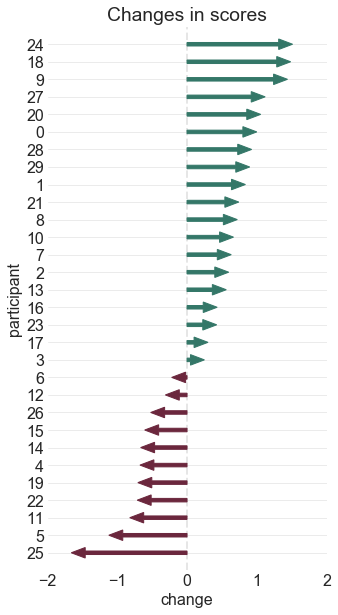

In [7]:
#sort individuals by amount of change, from largest to smallest
data = data.sort_values(by='change', ascending=True) \
           .reset_index(drop=True)

#initialize a plot
fig, ax = plt.subplots(figsize=(5,10))   #create figure
ax.set_xlim(-2,2)                        #set x axis limits
ax.set_ylim(-1,n)                        #set y axis limits
ax.set_yticks(range(n))                  #add 0-n ticks
ax.set_yticklabels(data['subject'])      #add y tick labels

#define arrows
arrow_starts = np.repeat(0,n)
arrow_lengths = data['change'].values

#add arrows to plot
for i, subject in enumerate(data['subject']):
    
    if arrow_lengths[i] > 0:
        arrow_color = '#347768'
    elif arrow_lengths[i] < 0:
        arrow_color = '#6B273D'
    else:
        arrow_color = 'black'
    
    ax.arrow(arrow_starts[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.6,         #arrow head width
             head_length=0.2,        #arrow head length
             width=0.2,              #arrow stem width
             fc=arrow_color,             #arrow fill color
             ec=arrow_color)             #arrow edge color
    
#format plot
ax.set_title('Changes in scores')                     #add title
ax.axvline(x=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='y', color='0.9')                        #add a light grid
ax.set_xlabel('change')                               #label the x axis
ax.set_ylabel('participant')                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes

### Create an arrow plot of changes in scores, with gradient arrows

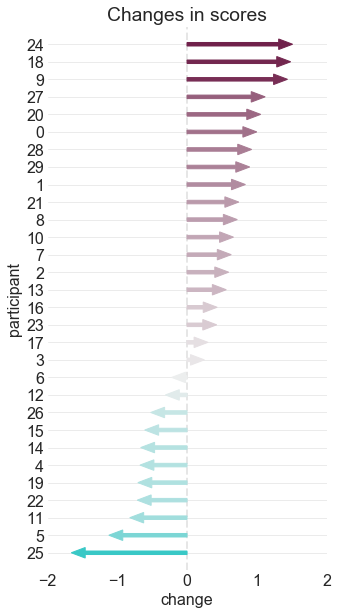

In [8]:
#define a color map: blue to purple
blue2purple = sns.blend_palette(['#39C8C6','#EEEEEE','#630C3A'], as_cmap=True, input='hex')

#assign color codes based on amount of change
#0:blue ... 128:gray ... 255:purple
max_change = np.max(np.abs(data['change']))
data['colors'] = ((data['change']/max_change)*128+128).astype(int)

#sort individuals by amount of change, from smallest to largest
data = data.sort_values(by='change', ascending=True) \
           .reset_index(drop=True)

#initialize a plot
fig, ax = plt.subplots(figsize=(5,10))   #create figure
ax.set_xlim(-2,2)                        #set x axis limits
ax.set_ylim(-1,n)                        #set y axis limits
ax.set_yticks(range(n))                  #add 0-n ticks
ax.set_yticklabels(data['subject'])      #add y tick labels

#define arrows
arrow_starts = np.repeat(0,n)
arrow_lengths = data['change'].values

#add arrows to plot
for i, subject in enumerate(data['subject']):
    
    arrow_color = blue2purple(data.loc[i,'colors'])
    
    ax.arrow(arrow_starts[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.6,         #arrow head width
             head_length=0.2,        #arrow head length
             width=0.2,              #arrow stem width
             fc=arrow_color,         #arrow fill color
             ec=arrow_color)         #arrow edge color
    
#format plot
ax.set_title('Changes in scores')                     #add title
ax.axvline(x=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='y', color='0.9')                        #add a light grid
ax.set_xlabel('change')                               #label the x axis
ax.set_ylabel('participant')                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes